# 凯泽窗

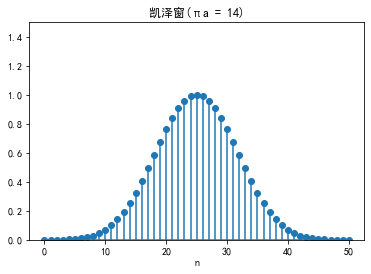

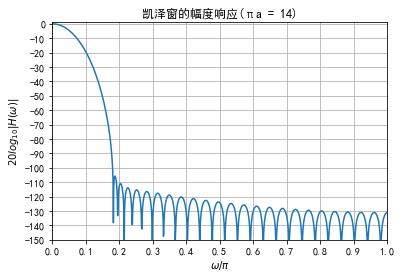

In [1]:
#导入使用的库
import numpy as np
from scipy import signal,fft
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#计算凯泽窗的wn值和幅度响应
N = 51 #凯泽窗长度
wn = signal.windows.kaiser(N,14) #凯泽窗的wn值
N0 = 2048;N1 = int(N0/2)
Ha = np.abs(fft.fft(wn,N0))+1e-10;Ha = Ha/np.max(Ha)
Ar = 20*np.log10(Ha);freq = np.linspace(0,1,N1)

#绘制凯泽窗
fig,ax = plt.subplots();ax.stem(wn,basefmt="")
ax.set_title('凯泽窗(πa = 14)');ax.set_xlabel('n');ax.set_ylim([0,1.5])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
fig.savefig('./win_kaiser1.png',dpi=500)

#绘制凯泽窗的幅度响应
fig,ax = plt.subplots();ax.plot(freq,Ar[:N1]);ax.grid()
ax.set_title('凯泽窗的幅度响应(πa = 14)');ax.set_xlabel('k')
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H ( \omega ) | $')
ax.set_xlim([0,1]);ax.set_ylim([-150,1])
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(16))
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./win_kaiser2.png',dpi=500)
